In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as pyo              #sets notebook to work in offline mode
pyo.init_notebook_mode()                   #sets to notebook mode
import plotly.express

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df=pd.read_csv('moviestreams.csv')
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [ ]:
cols=df.columns.tolist()

In [ ]:
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [ ]:
df.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [ ]:
cols=df.columns.tolist()
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

#Check for missing values

In [ ]:
df.isna()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
16740,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
16741,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True
16742,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.isna().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

#lets remove the + sign attatched to the age

In [ ]:
df.dtypes

Unnamed: 0           int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [ ]:
df['Age']

0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

In [ ]:
age_map={'18+':18,'7+':7,'13+':13,'All':0,'16+':16}
df['AgeCopy']=df['Age'].map(age_map)
df['AgeCopy']

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     NaN
16740     7.0
16741     NaN
16742     NaN
16743     NaN
Name: AgeCopy, Length: 16744, dtype: float64

#lets remove % sign to rotten tomatoes

In [ ]:
df['New_Rotten_Tomatoes']=df['Rotten Tomatoes'].replace('%',"")
for i in df['New_Rotten_Tomatoes']:
  if i == str:
    i.astype(int)


#Visualizations

##What is the no.of movies for each age group

In [ ]:
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

##Top 10 Languages in stream services

In [ ]:
df['Language'].value_counts()

English                                                                             10955
Hindi                                                                                 503
English,Spanish                                                                       276
Spanish                                                                               267
English,French                                                                        174
                                                                                    ...  
English,German,Hungarian,Romanian                                                       1
English,Spanish,Chinese,Latin                                                           1
English,Danish,Malay,Dutch,Indonesian,Finnish,Luxembourgish,French Sign Language        1
Dutch,French                                                                            1
English,Algonquin                                                                       1
Name: Lang

In [ ]:
Language=df['Language'].value_counts().head(10)

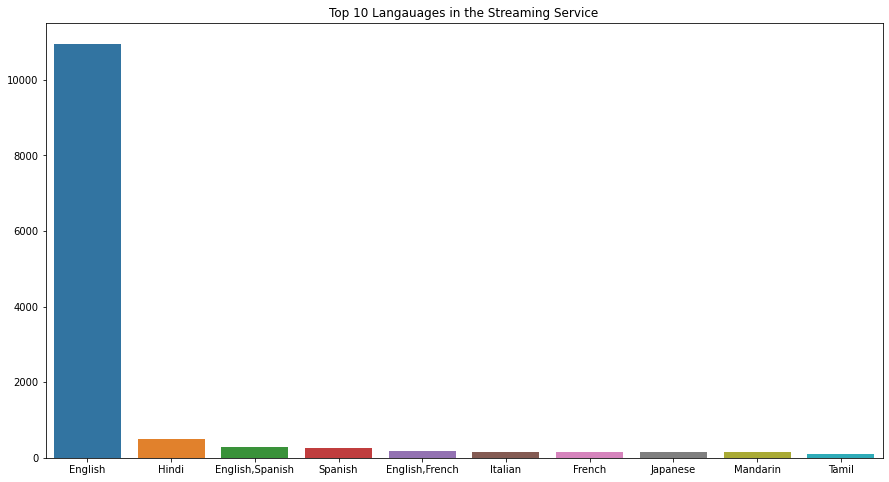

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Top 10 Langauages in the Streaming Service')
sns.barplot(x=Language.index,y=Language.values)

Plotting a pie chart

In [ ]:
from IPython.display import HTML
import plotly.express as px


fig=px.pie(df,
           values=Language.values,
           names=Language.index,
           title='Top 10 Languages in Streaming Services',
           
           )
HTML(fig.to_html())

##No.of Movies in specific age group

In [ ]:
from IPython.display import HTML
import plotly.express as px


fig=px.bar(df,
           x=df['Age'].value_counts().index,
           y=df['Age'].value_counts(),
           title='No.of Movies in specifi Age Groups',
           text=df['Age'].value_counts()
           )
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')  #text to be outside of the bar
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from IPython.display import HTML
import plotly.express as px


fig=px.bar(df,
           x=df['Age'].value_counts().index,
           y=df['Age'].value_counts(),
           title='No.of Movies in specific Age Groups in All Services',
           text=df['Age'].value_counts(),
           height=800
           )
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')  #text to be outside of the bar
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

##No.of Movies in Specific Age Group in Netflix

In [ ]:
from IPython.display import HTML
import plotly.express as px
 
netflix_df=df[df['Netflix']==1]
fig=px.bar(netflix_df,
             x=netflix_df['Age'].value_counts().index,
             y=netflix_df['Age'].value_counts(),
             title='No.of Movies in specific Age Groups in Netflix',
             text=netflix_df['Age'].value_counts(),
             height=500
             )
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())


Output hidden; open in https://colab.research.google.com to view.

##No.of Movies in Specific Age Group in Amazon Prime

In [ ]:
from IPython.display import HTML
import plotly.express as px
 
prime_df=df[df['Prime Video']==1]
fig=px.bar(prime_df,
             x=prime_df['Age'].value_counts().index,
             y=prime_df['Age'].value_counts(),
             title='No.of Movies in specific Age Groups in Amazon Prime Video',
             text=prime_df['Age'].value_counts(),
             height=500
             )
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

##No.of Movies in Specific Age Group in Disney+

In [ ]:
from IPython.display import HTML
import plotly.express as px
 
disney_df=df[df['Disney+']==1]
fig=px.bar(disney_df,
             x=disney_df['Age'].value_counts().index,
             y=disney_df['Age'].value_counts(),
             title='No.of Movies in specific Age Groups in Disney +',
             text=disney_df['Age'].value_counts(),
             height=500
             )
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

##No.of Movies in Specific Age Group in Hulu

In [ ]:
from IPython.display import HTML
import plotly.express as px
 
hulu_df=df[df['Hulu']==1]
fig=px.bar(hulu_df,
             x=hulu_df['Age'].value_counts().index,
             y=hulu_df['Age'].value_counts(),
             title='No.of Movies in specific Age Groups in Hulu',
             text=hulu_df['Age'].value_counts(),
             height=500
             )
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

#Rotten Tomatoes Score

##Rotten Tomatoes Rating For Overall Services

In [ ]:
from IPython.display import HTML
import plotly.express as px
 

fig=px.bar(df,
             x=df['Rotten Tomatoes'].value_counts().index,
             y=df['Rotten Tomatoes'].value_counts(),
             title='Overall Rotten Tomatoes Ratings',
             text=df['Rotten Tomatoes'].value_counts(),
             height=500
             )
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

##Rotten Tomatoes Rating For each Services

In [ ]:
rt_scores=pd.DataFrame({'Streaming Service':['Prime Video','Netflix','Disney+','Hulu'],
 'Rotten Tomatoes Score':[prime_df['Rotten Tomatoes'].value_counts()[0],
                         netflix_df['Rotten Tomatoes'].value_counts()[0],
                         disney_df['Rotten Tomatoes'].value_counts()[0],
                         hulu_df['Rotten Tomatoes'].value_counts()[0]
                         
                         
                         
     
 ]})
rt_scores.head()

,Streaming Service,Rotten Tomatoes Score
0,Prime Video,257
1,Netflix,130
2,Disney+,19
3,Hulu,18


In [ ]:
sort_rt_scores=rt_scores.sort_values(ascending=False,by='Rotten Tomatoes Score')
sort_rt_scores

,Streaming Service,Rotten Tomatoes Score
0,Prime Video,257
1,Netflix,130
2,Disney+,19
3,Hulu,18


In [ ]:
from IPython.display import HTML
import plotly.express as px
 

fig=px.bar(sort_rt_scores,
             x=sort_rt_scores['Streaming Service'],
             y=sort_rt_scores['Rotten Tomatoes Score'],
             title='Rotten Tomatoes Rating For each service',
             text=sort_rt_scores['Rotten Tomatoes Score'],
             height=500,
           
             )
fig.update_traces(marker_color='Pink',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

#IMDB Ratings

In [ ]:
from IPython.display import HTML
import plotly.express as px
 

fig=px.bar(df,
             x=df['IMDb'].value_counts().index,
             y=df['IMDb'].value_counts(),
             title='Overall IMDb Ratings',
             text=df['IMDb'].value_counts(),
             height=500
             )
fig.update_traces(marker_color='black',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

#Count of RunTime of Movies

In [ ]:
RuntimeCount=pd.DataFrame(dict(df['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(),
             columns=['Run Time','Count'])
RuntimeCount

,Run Time,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408
...,...,...
152,19.0,8
153,32.0,8
154,9.0,8
155,7.0,8


In [ ]:
from IPython.display import HTML
import plotly.express as px
 

fig = px.bar(df,
             x=RuntimeCount['Run Time'],
             y=RuntimeCount['Count'],
             title='Count of Runtime of Movies',
             text=RuntimeCount['Run Time'],
             height=500
             )
fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

#Directors and their Count of Movies they have directed

In [ ]:
df['Directors']=df['Directors'].astype(str)

In [ ]:
new_data = df[df['Directors'] != np.nan]
# new_data=df['Directors']
directors_count = dict()
direc_in_data = list(new_data['Directors'])
for xdir in direc_in_data:
    curr_dirs = xdir.split(",")
    for xd in curr_dirs:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
            # print(directors_count[xd])
            # print('========================')
        else:
            directors_count[xd] = 1
            # print(directors_count[xd])

In [ ]:
DirCount=pd.DataFrame(directors_count.items(),columns=['Director','Count'])
DirCount=DirCount.sort_values(by='Count',ascending=False).head(20)
DirCount

,Director,Count
56,nan,726
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21


In [ ]:
DirCount=DirCount.drop(56, axis=0)

DirCount

,Director,Count
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21
1415,Jan Suter,21


In [ ]:
from IPython.display import HTML
import plotly.express as px
 

fig = px.bar(DirCount, 
             x=DirCount['Director'], 
             y=DirCount['Count'],
             title="Directors And The Count Of Movies They Have Directed",
             text=DirCount['Count'],
             height=600)
fig.update_traces(marker_color='chocolate',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df[df['Directors']=='Jay Chapman']

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
1014,1014,1015,Jim Gaffigan: Obsessed,2014,16+,7.6,100%,1,0,0,0,0,Jay Chapman,"Documentary,Comedy",United States,English,60.0
1234,1234,1235,Iliza Shlesinger: War Paint,2013,NaN,6.7,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,75.0
1417,1417,1418,Tom Segura: Completely Normal,2014,NaN,7.8,NaN,1,0,1,0,0,Jay Chapman,"Documentary,Comedy",United States,English,74.0
2211,2211,2212,Todd Barry: Spicy Honey,2017,NaN,6.7,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,60.0
2331,2331,2332,Craig Ferguson: Tickle Fight,2017,NaN,6.6,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,66.0
2393,2393,2394,Colin Quinn: Unconstitutional,2015,NaN,7.1,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,55.0
2447,2447,2448,Lucas Brothers: On Drugs,2017,NaN,5.5,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,50.0
2523,2523,2524,D.L. Hughley: Contrarian,2018,NaN,6.5,NaN,1,0,0,0,0,Jay Chapman,Comedy,United States,English,58.0
2636,2636,2637,D.L. Hughley: Clear,2014,NaN,6.7,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,English,60.0
2721,2721,2722,Moshe Kasher: Live in Oakland,2012,NaN,6.8,NaN,1,0,1,0,0,Jay Chapman,Comedy,United States,NaN,61.0


In [ ]:
df[df['Directors']=='Jay Chapman'][['Directors','Language','Genres','Runtime']]

,Directors,Language,Genres,Runtime
1014,Jay Chapman,English,"Documentary,Comedy",60.0
1234,Jay Chapman,English,Comedy,75.0
1417,Jay Chapman,English,"Documentary,Comedy",74.0
2211,Jay Chapman,English,Comedy,60.0
2331,Jay Chapman,English,Comedy,66.0
2393,Jay Chapman,English,Comedy,55.0
2447,Jay Chapman,English,Comedy,50.0
2523,Jay Chapman,English,Comedy,58.0
2636,Jay Chapman,English,Comedy,60.0
2721,Jay Chapman,NaN,Comedy,61.0


#Exploring Genres

In [ ]:
genres=dict(df['Genres'].value_counts())


genres_count = dict()

for g,count in genres.items():
    g = g.split(",")
    for i in g:
        if i in genres_count.keys():
            genres_count[i] = genres_count.get(i) + 1
            # print(directors_count[xd])
            # print('========================')
        else:
            genres_count[i] = 1
            # print(directors_count[xd])

In [ ]:
genres_count

{'Drama': 868,
 'Documentary': 249,
 'Comedy': 654,
 'Horror': 296,
 'Romance': 420,
 'Thriller': 467,
 'Action': 553,
 'Crime': 347,
 'Music': 171,
 'Mystery': 318,
 'Western': 168,
 'Family': 426,
 'Sci-Fi': 312,
 'Biography': 190,
 'History': 198,
 'War': 170,
 'Sport': 126,
 'Short': 141,
 'Animation': 265,
 'Adventure': 560,
 'Fantasy': 371,
 'Musical': 171,
 'News': 36,
 'Film-Noir': 25,
 'Reality-TV': 8,
 'Talk-Show': 8,
 'Game-Show': 6}

In [ ]:
genres=pd.DataFrame(genres_count.items(),columns=['Genres','Count'])
genres=genres.sort_values(by='Count',ascending=False).head(20)
genres

,Genres,Count
0,Drama,868
2,Comedy,654
19,Adventure,560
6,Action,553
5,Thriller,467
11,Family,426
4,Romance,420
20,Fantasy,371
7,Crime,347
9,Mystery,318


In [ ]:
from IPython.display import HTML
import plotly.express as px
 

fig = px.bar(genres, 
             x=genres['Genres'], 
             y=genres['Count'],
             title="Genres and their count",
             text=genres['Count'],
             height=600)
fig.update_traces(marker_color='red',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

#Top Movies on Each Platform

##On Netflix

In [ ]:
data_netflix_top = netflix_df[netflix_df['IMDb']>8.5]
data_netflix_top = data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
data_netflix_top

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1214,Bill Hicks: Relentless,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1458,Untamed Romania,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
845,Gol Maal,8.6


In [ ]:
from IPython.display import HTML
import plotly.express as px

fig=px.bar(data_netflix_top,
           x=data_netflix_top['Title'],
           y=data_netflix_top['IMDb'],
           title='Top Movies Streaming on Netflix',
           text=data_netflix_top['IMDb'],
           height=600,
           )
fig.update_traces(marker_color='red',texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

##Amazon Prime

In [154]:
data_prime_top=prime_df[prime_df['IMDb']>8.9]
data_prime_top=data_prime_top[['Title','IMDb']].sort_values(by='IMDb',ascending=False)
data_prime_top

,Title,IMDb
5110,Love on a Leash,9.3
6566,Square One,9.3
6837,Steven Banks: Home Entertainment Center,9.3
7220,"Down, But Not Out!",9.3
7426,Bounty,9.3
7491,Finding Family,9.1
8458,Where's Daddy?,9.1
7002,Escape from Firebase Kate,9.0
7267,A Dog Named Gucci,9.0


In [155]:
from IPython.display import HTML
import plotly.express as px

fig=px.bar(data_prime_top,
           x=data_prime_top['Title'],
           y=data_prime_top['IMDb'],
           title='Top Movies Streaming on Amazon Prime Video',
           text=data_prime_top['IMDb'],
           height=800,
           )
fig.update_traces(marker_color='blue',texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

##Top Movies Streaming on Disney+

In [148]:
data_disney_top=disney_df[disney_df['IMDb']>8.5]
data_disney_top=data_disney_top[['Title','IMDb']].sort_values(by='IMDb',ascending=False)
data_disney_top

,Title,IMDb
16213,Star Wars: The Empire Strikes Back,8.7
16212,Star Wars: A New Hope,8.6


In [150]:
from IPython.display import HTML
import plotly.express as px

fig=px.bar(data_disney_top,
           x=data_disney_top['Title'],
           y=data_disney_top['IMDb'],
           title='Top Movies Streaming on Disney+',
           text=data_disney_top['IMDb'],
           height=600,
           )
fig.update_traces(marker_color='dark blue',texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

##Top Movies Streaming On Hulu

In [151]:
data_hulu_top=hulu_df[hulu_df['IMDb']>8.5]
data_hulu_top=data_hulu_top[['Title','IMDb']].sort_values(by='IMDb',ascending=False)
data_hulu_top

,Title,IMDb
3560,The Dark Knight,9.0
3561,GoodFellas,8.7
3562,Parasite,8.6
3564,The Green Mile,8.6


In [153]:
from IPython.display import HTML
import plotly.express as px

fig=px.bar(data_hulu_top,
           x=data_hulu_top['Title'],
           y=data_hulu_top['IMDb'],
           title='Top Movies Streaming on Hulu',
           text=data_hulu_top['IMDb'],
           height=600,
           )
fig.update_traces(marker_color='lightsalmon',texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.